In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation
import matplotlib.gridspec as gridspec
from IPython import display
import sympy as sp
import random

# CODIGOS

In [2]:
def Gif_Function( xLim=(-4,3), yLim=(-10,10), f="x^2 + x^4"):
    
    x = sp.symbols('x')
    f = sp.lambdify(x,f)
    
    Figure = plt.figure() 
    # creating a plot
    lines_plotted = plt.plot([])    
    line_plotted = lines_plotted[0]
 
    plt.xlim(xLim) 
    plt.ylim(yLim)   
    
    x, y = np.linspace(xLim[0], xLim[1]) , 0
    
    def AnimationFunction(frame):
        y = f(x)
        line_plotted.set_data((x, y))
        line_plotted.set_data(())

    anim_created = FuncAnimation(Figure, AnimationFunction, frames=100, interval=25)
    
    # anim_created.save('dynamic_images.mp4')
    video = anim_created.to_html5_video()
    html = display.HTML(video)
    display.display(html)
    # good practice to close the plt object.
    plt.close()
    return

In [4]:
class Graph1D:
    
    def __init__(self, function, xLim, yLim, title=None):
        assert(len(xLim) == 2)
        assert(len(yLim) == 2)
        self._range = 500
        self._f = function
        if type(function) == str: self._f = sp.lambdify(sp.symbols('x'),function)
        x = np.linspace(xLim[0], xLim[1], self._range)
        y = self._f(x)
        self._fig, self._ax = plt.subplots()
        if title: self._ax.set_title(title, fontsize=20)
        self._fig.set_size_inches(10,7)
        self._ax.set_xlim(xLim)
        self._ax.set_ylim(yLim)
        self._ax.plot(x,y)
  
    def add_point(self, point, color='r', text=None, dt=0.0):
        x1, x2 = point
        self._ax.scatter(x1,x2,color=color)
        if text:
            self._ax.text(x1,x2+dt,str(text))
            
    def add_line(self, point1, point2, color='black', text=None, dt=0.0):
        x1, y1 = point1
        x2, y2 = point2
        self._ax.plot((x1,x2),(y1,y2), color=color, marker='o')
        if text != None:
            self._ax.text(x1,x2+dt,str(text))
            
    def add_x_axis(self, color='black'):
        self._ax.axhline(0, color=color) # marker='o'
        
    def getfig(self):
        return self._fig, self._ax

class Graph2D:
    
    def __init__(self, function, xLim, yLim, title = None):
        self._range = 500
        assert(len(xLim) == 2)
        assert(len(yLim) == 2)
        x = np.linspace(xLim[0], xLim[1], self._range)
        y = np.linspace(yLim[0], yLim[1], self._range)
        X, Y = np.meshgrid(x, y)
        Z = function(X, Y)
        self._fig, self._ax = plt.subplots()
        if title: self._ax.set_title(title, fontsize=20)
        self._fig.set_size_inches(10,7)
        self._ax.set_xlim(xLim)
        self._ax.set_ylim(yLim)
        CS = self._ax.contourf(X, Y, Z, 10) 
        self._fig.colorbar(CS)
  
    def add_point(self, point, color='r', text=None, dt=0.0, textColor="black"):
        x1, x2 = point
        self._ax.scatter(x1,x2,color=color)
        if text != None:
            plt.text(x1,x2,str(text),color=textColor)
        
    def getfig(self):
        return self._fig, self._ax


In [5]:
class Newton_Raphson:
    
    def __init__(self,x0, eps = 1e-9, f="x**2", it=None):
        assert(type(f) == str)
        self._it = it
        self._x0 = x0
        self._eps = eps
        self._x = sp.symbols('x')
        self._df = sp.diff(f)
        self._ddf = sp.diff(self._df)
        self._f = sp.lambdify(self._x,f)
        self._df = sp.lambdify(self._x,self._df)
        self._ddf = sp.lambdify(self._x,self._ddf)
            
    def run(self, f=None, df=None, ddf=None):
        x0= self._x0
        if f == None: f = self._f
        if df == None: df = self._df
        if ddf == None: ddf = self._ddf
        pts = []
        cnt = 0
        while True:
            pts.append((x0,f(x0),df(x0),ddf(x0)))
            x1 = x0 - df(x0)/ddf(x0)
            if abs(x1-x0) < self._eps:
                break
            x0 = x1
            cnt = cnt+1
            if self._it != None and cnt == self._it: break
        pts.append((x1,f(x1),df(x1),ddf(x1)))
        
        print(f"x1: {x1}, f:{f(x1)}, f':{df(x1)}, f'':{ddf(x1)}")
        return pts

In [6]:
class Secante:
    
    def __init__(self,a, b, eps=1e-9,f = " x**2 ", it=None):
        assert(type(f) == str)
        self._it = it
        self._a = a
        self._b = b
        self._eps = eps
        self._flag = 0
        self._x = sp.symbols('x')
        self._df = sp.diff(f)
        self._f = sp.lambdify(self._x,f)
        self._df = sp.lambdify(self._x,self._df)
  
    def run(self, f=None, df=None):
        a, b, flag = self._a, self._b, self._flag
        if f == None: f = self._f
        if df == None: df = self._df
        pts = []
        al = (a+b)/2
        cnt = 0
        while abs(df(al)) > self._eps:
            al = b - df(b) * (b-a)/(df(b)-df(a))
            if df(al) > 0: 
                b = al
            else: 
                a = al
            pts.append((al,f(al),df(al),a,b))
            cnt = cnt+1
            if self._it != None and cnt == self._it: break
            
        print(f"al: {al}, f:{f(al)}")
        return pts

# Ejercicio 1
Comparar el método de Newton-Raphson y el método de la Secante en la función f(x) = x
2 + x
4
.
Para Newton-Raphson inicializar x = −4. Para Secante inicializar a = −4 y b = −3. Para ambos
métodos usar un e = 1e
−8
. Ejecutar cada método con 10 iteraciones. Hacer dos gráficos:
1. Graficar f vs. la iteración para cada método.
2. Graficar f
0 vs. x. Superponga la progresión de cada método, dibujando líneas desde
(x
i
, f
0
(x
i
)) hasta (x
i+1
, 0) para cada iteración i.
¿Qué podemos concluir sobre esta comparación?


x1: -1.6543612251060553e-24, f:2.7369110631344083e-48, f':-3.308722450212111e-24, f'':2.0


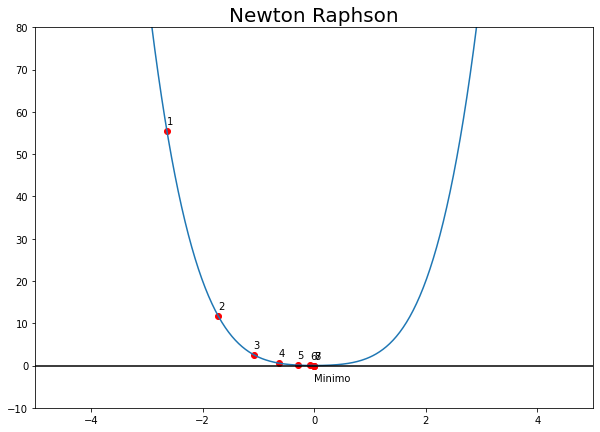

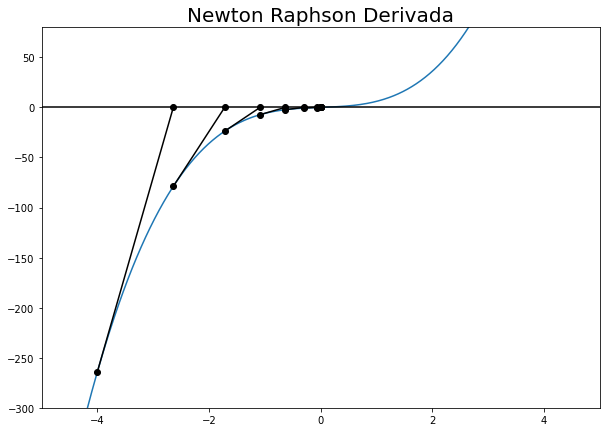

In [7]:
newt = Newton_Raphson(-4.0,1e-8,f="x**4 + x**2", it = 10)
pts = newt.run()
g1 = Graph1D(newt._f,(-5.0,5.0),(-10,80), title="Newton Raphson")
g2 = Graph1D(newt._df,(-5.0,5.0),(-300,80), title="Newton Raphson Derivada")
for i in range(0,len(pts)-1):
    g1.add_point(pts[i][:2],text=i,dt=1.6)
    g2.add_line(pts[i][:3:2],(pts[i+1][0],0))
g2.add_x_axis()
g1.add_x_axis()
min_point = pts[-1][:2]
g1.add_point(min_point,text="Minimo",dt=-3.6)

al: 0.47657603250582814, f:0.2787103508133515


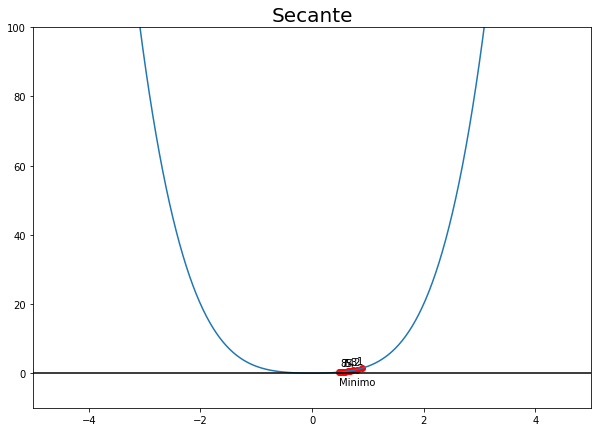

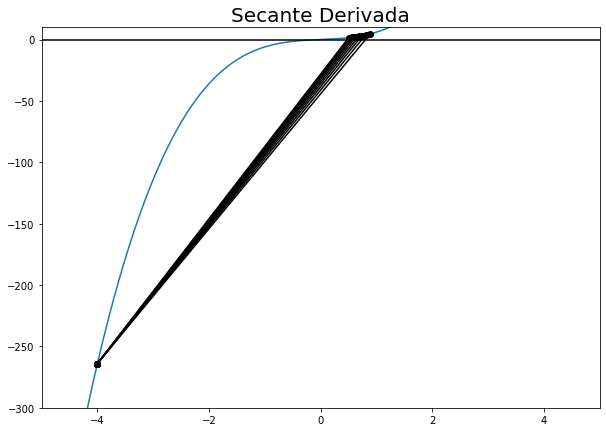

In [6]:
sec = Secante(-4.0, 3.0, 1e-8, f="x**4 + x**2", it = 10)
pts = sec.run()
g1_s = Graph1D(sec._f,(-5.0,5.0),(-10,100), title="Secante")
g2_s = Graph1D(sec._df,(-5.0,5.0),(-300,10), title="Secante Derivada")
g1_s.add_x_axis()
g2_s.add_x_axis()
for i in range(0,len(pts)-1):
    g1_s.add_point(pts[i][:2],text=i,dt=1.6)
    g2_s.add_line((pts[i][-1],sec._df(pts[i][-1])),((pts[i][-2],sec._df(pts[i][-2]))))
min_point = pts[-1][:2] 
g1_s.add_point(min_point,text="Minimo",dt=-3.6)

## Conclusion ejercicio 1

A pesar que ambas hacen uso de derivadas, el metodo de Newton Raphson demostro ser mucho mas eficiente que el de Secante, pues este ultimo parece quedarse atascado en varias interaciones, e incluso no llego al minimo local.

En el metodo de Newton podemos ver como las pendientes de la derivada converge rapidamente hacia un punto minimo, no siendo el caso del metodo Secante en que los valores convergen demasiado lento.

# Ejercicio 2
Realizar lo mismo que el ejercicio anterior, si usar las derivadas explicitas y en su lugar usar las
siguientes aproximaciones:
f
0
(x) = l´ım∆x→0
f(x+∆x)−f(x)
∆x
f
00(x) = l´ım∆x→0
f
0
(x+∆x)−f
0
(x)
∆x
donde ∆x = (x + ∆x) − (x).


## Funciones Aproximaciones

In [7]:
delta = 0.0000001
f = lambda x: x**4 + x**2
df = lambda x: ( f(x+delta) - f(x) ) / delta
ddf = lambda x: ( df(x+delta) - df(x) ) / delta

x1: -5e-08, f:2.500000000000006e-15, f':0.0, f'':2.00000000000005


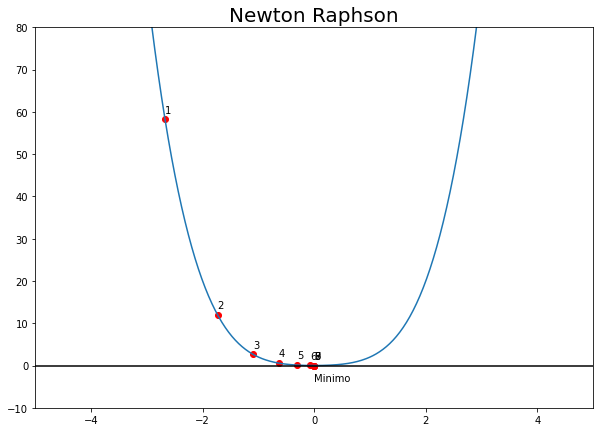

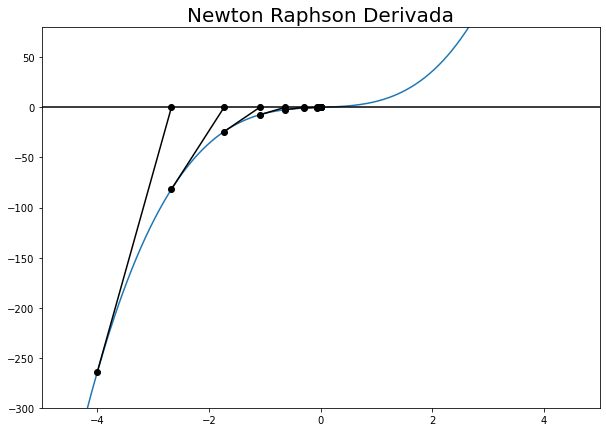

In [8]:
newt = Newton_Raphson(-4.0,1e-8,f="x**4 + x**2", it = 10)
pts = newt.run(f,df,ddf)
g1 = Graph1D(newt._f,(-5.0,5.0),(-10,80), title="Newton Raphson")
g2 = Graph1D(newt._df,(-5.0,5.0),(-300,80), title="Newton Raphson Derivada")
for i in range(0,len(pts)-1):
    g1.add_point(pts[i][:2],text=i,dt=1.6)
    g2.add_line(pts[i][:3:2],(pts[i+1][0],0))
g2.add_x_axis()
g1.add_x_axis()
min_point = pts[-1][:2]
g1.add_point(min_point,text="Minimo",dt=-3.6)

al: 0.47657603250582814, f:0.2787103508133515


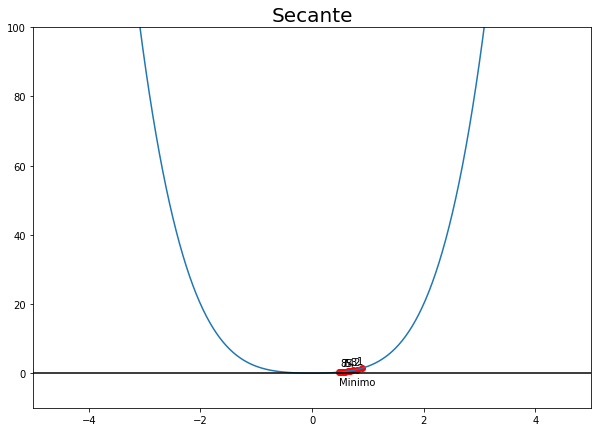

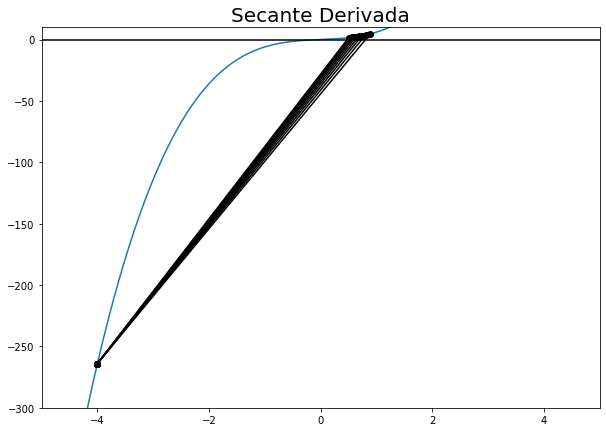

In [9]:
sec = Secante(-4.0, 3.0, 1e-8, f="x**4 + x**2", it = 10)
pts = sec.run()
g1_s = Graph1D(sec._f,(-5.0,5.0),(-10,100), title="Secante")
g2_s = Graph1D(sec._df,(-5.0,5.0),(-300,10), title="Secante Derivada")
g1_s.add_x_axis()
g2_s.add_x_axis()
for i in range(0,len(pts)-1):
    g1_s.add_point(pts[i][:2],text=i,dt=1.6)
    g2_s.add_line((pts[i][-1],sec._df(pts[i][-1])),((pts[i][-2],sec._df(pts[i][-2]))))
min_point = pts[-1][:2] 
g1_s.add_point(min_point,text="Minimo",dt=-3.6)

## Conclusion ejercicio 2

Usando las aproximaciones llegamos a los mismos resultados que en el ejercicio 1, lo que indica que estas aproximaciones funcionan de una manera correcta, y son utiles cuando no tenemos librerias que deriven explicitamente.

# Ejercicio 3

Con x = (−5, 5) use los métodos unidimensionales de Newton-Raphson y de la Secante para
resolver la siguiente función:
$f(x) = x_1^2 + x_2^2 − 2x_1
$

¿Qué podemos concluir sobre esta comparación?


Lo que podemos hacer es separar en dos funciones, cada una con respecto a cada variable, resolver independientemente y despues juntar los valores.

### Funciones

In [68]:
f = lambda x,y : x**2 + y**2 - 2*x
f_x = "x**2 - 2*x" 
f_y = "x**2"
space = (-6.0,6.0)

x1: 1.0, f:-1.0, f':0.0, f'':2
x1: 0.0, f:0.0, f':0.0, f'':2


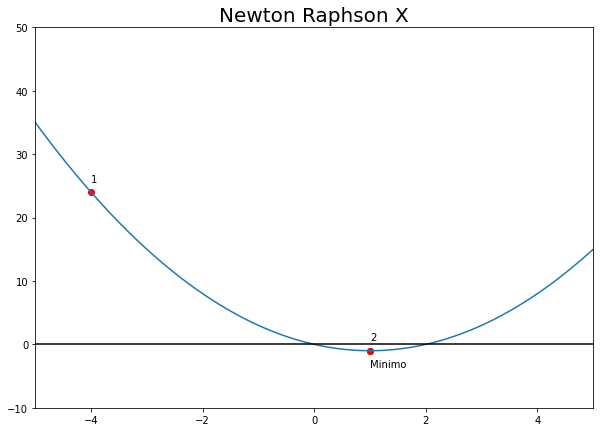

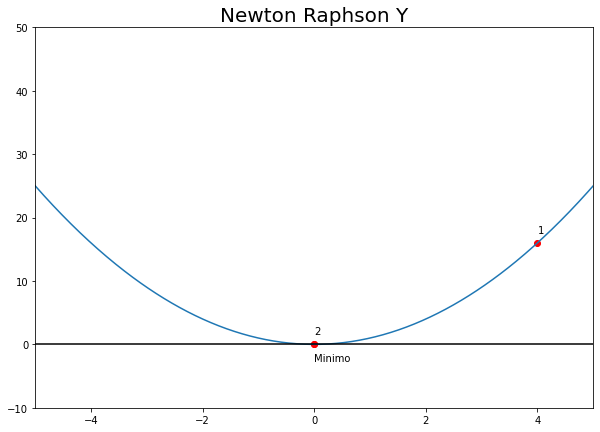

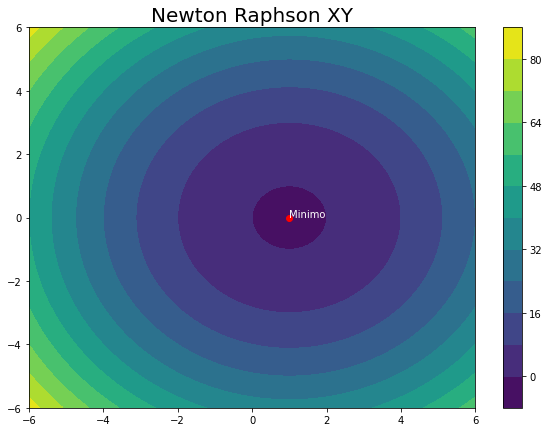

In [81]:
newt_x = Newton_Raphson(-4.0, f=f_x)
newt_y = Newton_Raphson(4.0, f=f_y)
pts_x = newt_x.run()
pts_y = newt_y.run()

gn_x = Graph1D(newt_x._f,(-5.0,5.0),(-10,50), title="Newton Raphson X")
gn_y = Graph1D(newt_y._f,(-5.0,5.0),(-10,50), title="Newton Raphson Y")
g2_n = Graph2D(f,space,space, title="Newton Raphson XY")

for i in range(0,len(pts_x)-1):
    gn_x.add_point(pts_x[i][:2],text=i+1,dt=1.6)
for i in range(0,len(pts_y)-1):
    gn_y.add_point(pts_y[i][:2],text=i+1,dt=1.6)
gn_x.add_x_axis()
gn_y.add_x_axis()

min_point_x = pts_x[-1][:2]
gn_x.add_point(min_point_x,text="Minimo",dt=-2.6)
min_point_y = pts_y[-1][:2]
gn_y.add_point(min_point_y,text="Minimo",dt=-2.6)
min_point_xy = (min_point_x[0], min_point_y[0])
g2_n.add_point(min_point_xy,text="Minimo",dt=-2.6,textColor="white")

al: 1.0, f:-1.0
al: 0.0, f:0.0
[(1.0, -1.0, 0.0, 1.0, 3.0)] [(0.0, 0.0, 0.0, 0.0, 3.0)]


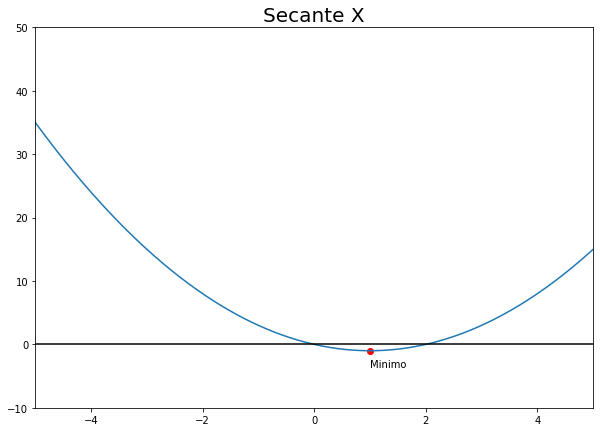

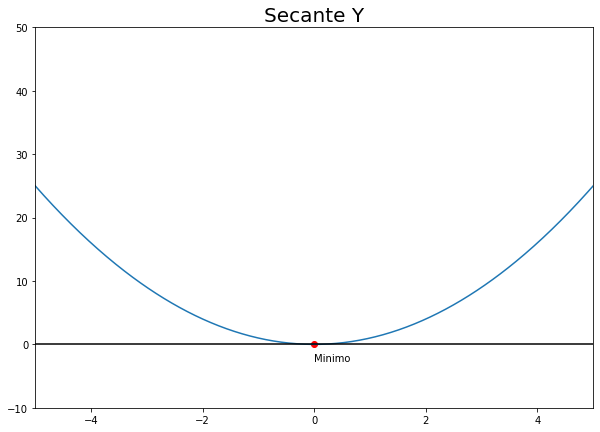

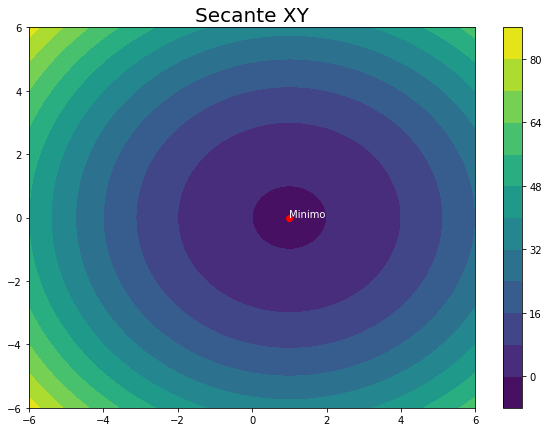

In [94]:
sec_x = Secante(-4.0, 3.0, f=f_x)
sec_y = Secante(-4.0, 3.0, f=f_y)
pts_x = sec_x.run()
pts_y = sec_y.run()

gs_x = Graph1D(sec_x._f,(-5.0,5.0),(-10,50), title="Secante X")
gs_y = Graph1D(sec_y._f,(-5.0,5.0),(-10,50), title="Secante Y")
g2_s = Graph2D(f,space,space, title="Secante XY")

for i in range(0,len(pts_x)-1):
    gs_x.add_point(pts_x[i][:2],text=i+1,dt=1.6)
for i in range(0,len(pts_y)-1):
    gs_y.add_point(pts_y[i][:2],text=i+1,dt=1.6)
gs_x.add_x_axis()
gs_y.add_x_axis()

print(pts_x,pts_y)

min_point_x = pts_x[-1][:2]
gs_x.add_point(min_point_x,text="Minimo",dt=-2.6)
min_point_y = pts_y[-1][:2]
gs_y.add_point(min_point_y,text="Minimo",dt=-2.6)
min_point_xy = (min_point_x[0], min_point_y[0])
g2_s.add_point(min_point_xy,text="Minimo",dt=-2.6,textColor="white")

# Conclusiones Ejercicio 3

Podemos ver que ambos algoritmos llegan al optimo global de la funcion aun corriendolos individualmente, lo que demuestra que para este tipo de funciones es posible separarlas en cada una de sus dimensiones y aplicar operaciones con la derivada para llegar a un minimo, algo parecido a como funciona el algoritmo del gradiente.